### AIML-INCAF-1 Módulo 2: Identificar origen de datos
### Elaboración de un informe sobre una aplicación específica de IA en el sector bancario
### K00003031: Gabriel Guzmán

## Indicaciones Generales
En parejas, los estudiantes deben elaborar un informe que describa una aplicación específica de la inteligencia artificial en el sector bancario. 

Pueden incluir temas como:
- Detección de fraudes
- Optimización de servicios bancarios
- Análisis de datos de clientes 
- Evaluación de riesgos crediticios. 

La investigación debe de contener las fuentes de dónde provenga la información y reflejar cómo la IA impacta en el sector bancario a través del ejemplo estudiado.

El trabajo se presentará en un documento de word de 3 a 4 páginas, en formato académico con introducción, desarrollo y conclusión.

## Introducción
Para esta actividad se ha tomado la "detección de fraudes" AML (Anti Money Laundering), la fuente de información se ha tomado de kaggle.com para el caso de estudio IBM AML, archivo fuente LI-Small_Trans.csv

## Desarrollo del análisis
### 1. Cargando datos
Archivo fuente tomado de: https://www.kaggle.com/datasets/ealtman2019/ibm-transactions-for-anti-money-laundering-aml/data?select=LI-Small_Trans.csv


In [1]:
#Leyendo datos
import pandas as pd
df = pd.read_csv("DataSet/LI-Small_Trans.csv")

In [3]:
#Explorando estructura de datos
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6924049 entries, 0 to 6924048
Data columns (total 11 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Timestamp           object 
 1   From Bank           int64  
 2   Account             object 
 3   To Bank             int64  
 4   Account.1           object 
 5   Amount Received     float64
 6   Receiving Currency  object 
 7   Amount Paid         float64
 8   Payment Currency    object 
 9   Payment Format      object 
 10  Is Laundering       int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 581.1+ MB


### 2. Explorando datos a Analizar (EDA)
Realizaramos una revisión básica de valores vacios y registros duplicados.

In [4]:
#Verificando datos vacios
df.isna().sum()

Timestamp             0
From Bank             0
Account               0
To Bank               0
Account.1             0
Amount Received       0
Receiving Currency    0
Amount Paid           0
Payment Currency      0
Payment Format        0
Is Laundering         0
dtype: int64

In [7]:
#buscando duplicados
df.duplicated().sum()


np.int64(8)

In [8]:
#Eliminado duplicados
df.drop_duplicates(inplace=True)
df.shape

(6924041, 11)

### 3. Limpieza y transformación
Realizamos una limpieza de la información que se analizará y tratamiento de los campos para transformar los campos de nuestro dataframe

In [12]:
#Revisando Tipos de Datos
df.dtypes

Timestamp              object
From Bank               int64
Account                object
To Bank                 int64
Account.1              object
Amount Received       float64
Receiving Currency     object
Amount Paid           float64
Payment Currency       object
Payment Format         object
Is Laundering           int64
dtype: object

In [14]:
#Transformando tipos de datos para un mejor tratamiento
df['Timestamp']= pd.to_datetime(df['Timestamp'])
df['From Bank']= df['From Bank'].astype('object')
df['To Bank']= df['To Bank'].astype("object")
df['Is Laundering']= df["Is Laundering"].astype('object')


In [15]:
df.dtypes

Timestamp             datetime64[ns]
From Bank                     object
Account                       object
To Bank                       object
Account.1                     object
Amount Received              float64
Receiving Currency            object
Amount Paid                  float64
Payment Currency              object
Payment Format                object
Is Laundering                 object
dtype: object

### 4. Particionando Datos
En esta sección haremos un pequeño analisis de la información que se tiene para identificar nuestra variable objetivo.

<Axes: >

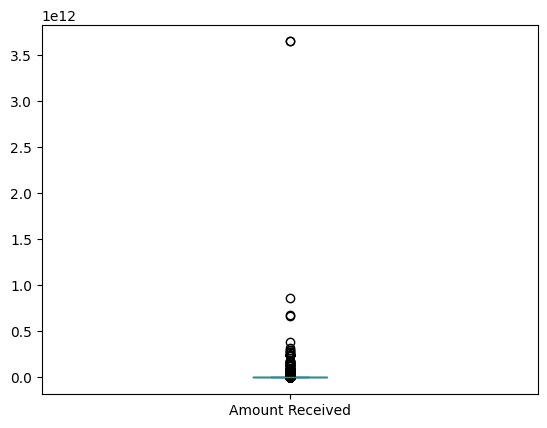

In [18]:
# Analizando datos según montos transaccionados
df['Amount Received'].plot(kind='box')

In [19]:
#De nuestra estructura de datos tomaremos la columna "Timestamp"
df.columns

Index(['Timestamp', 'From Bank', 'Account', 'To Bank', 'Account.1',
       'Amount Received', 'Receiving Currency', 'Amount Paid',
       'Payment Currency', 'Payment Format', 'Is Laundering'],
      dtype='object')

In [23]:
# Creamos la columan "Date" el cual contendrá la fecha de la columna "Timestamp"
df['Date']=df["Timestamp"].dt.date
# Ahora creamos la columna "Time" el cual contendrá solo la hora de la columna "Timestamp"
df['Time']=df["Timestamp"].dt.time
# Nuestro DataFrame ahora tiene 2 nuevas columnas
df.head(3)

,Timestamp,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering,Date,Time
0,2022-09-01 00:08:00,11,8000ECA90,11,8000ECA90,3195403.00,US Dollar,3195403.00,US Dollar,Reinvestment,0,2022-09-01,00:08:00
1,2022-09-01 00:21:00,3402,80021DAD0,3402,80021DAD0,1858.96,US Dollar,1858.96,US Dollar,Reinvestment,0,2022-09-01,00:21:00
2,2022-09-01 00:00:00,11,8000ECA90,1120,8006AA910,592571.00,US Dollar,592571.00,US Dollar,Cheque,0,2022-09-01,00:00:00


In [31]:
# Cuál ha sido el mayor monto que ha transaccionado?
df['Amount Received'].max()


np.float64(3644853662746.95)

In [26]:
# Cuál es el menor monto que se ha transaccionado?
df['Amount Received'].min()


np.float64(1e-06)

In [28]:
# De cuánto es nuestra media de transacciones recibidas?
df['Amount Received'].mean()


np.float64(6324073.911975413)

In [29]:
# De cuánto es nuestra media de transacciones pagadas?
df['Amount Paid'].mean()

np.float64(4676041.375337785)

In [32]:
# Cuánto es el porcentaje de nuestros datos que han sido marcados como "lavado" de dinero
df['Is Laundering'].value_counts()/df.shape[0]

Is Laundering
0    0.999485
1    0.000515
Name: count, dtype: float64

<Axes: xlabel='Date'>

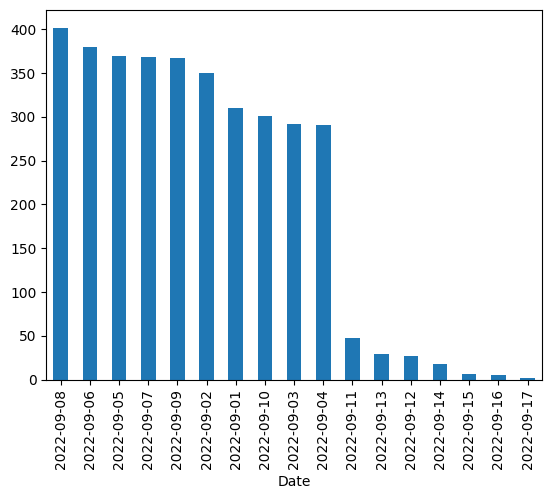

In [33]:
#Desplegando información por fecha en que se realizó el fraude
df[df['Is Laundering']==1]['Date'].value_counts().plot(kind='bar')

### 5. Entrenamiento y Testeo
Ya con los datos analizados procederemos ha crear un modelo de entrenamiento para posteriormente realizar nuestro testo de información y tratar de predecir la frecuencia del próximo fraude.

Utilizaremos el modelo de regresión lineal para crear nuestro objeto de aprendizaje y testeo

In [82]:
# Mi Variable target = "Is Laundering"
import matplotlib.pyplot as plt

# Importa la clase LinearRegression para crear un modelo de regresión lineal
from sklearn.linear_model import LinearRegression 
# Importa la clase de entrenamiento
from sklearn.model_selection import train_test_split
# Importa la métrica del error cuadrático medio (MSE) para evaluar el rendimiento del modelo
from sklearn.metrics import mean_squared_error 
# Importa NumPy, una biblioteca para realizar operaciones numéricas y trabajar con arrays
import numpy as np 


model = LinearRegression()


Despleando resultados de nuestro entrenamiento y testeo

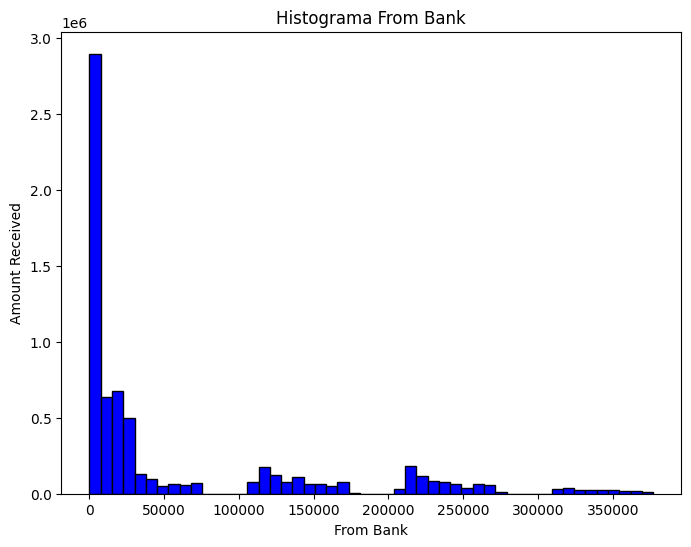

In [57]:
# Crear el histograma para la variable 'From Bank'
plt.figure(figsize=(8,6))
plt.hist(df['From Bank'], bins=50, color='blue', edgecolor='black')
plt.title('Histograma From Bank')
plt.xlabel('From Bank')
plt.ylabel('Amount Received')

# Mostrar la gráfica
plt.show()

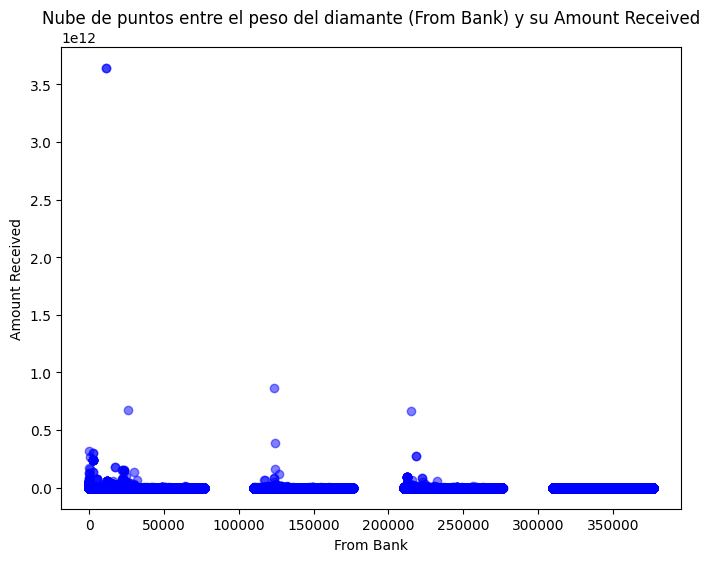

In [58]:
# Crear una nube de puntos (scatter plot) entre 'price' y 'carat'
plt.figure(figsize=(8,6))
plt.scatter(df['From Bank'], df['Amount Received'], color='blue', alpha=0.5)
plt.title('Nube de puntos entre el peso del diamante (From Bank) y su Amount Received')
plt.xlabel('From Bank')
plt.ylabel('Amount Received')

# Mostrar la gráfica
plt.show()

In [63]:
#Analizo correlación
correlation = df['From Bank'].corr(df['Amount Received'])
print(f"Correlación entre From Bank y Amount Received: {correlation}")

Correlación entre From Bank y Amount Received: -0.00045963823458977925


In [64]:
#creo el modelo de mis datos a correlacionar
model = model.fit( df[ ["From Bank"] ], df["Amount Received"] )

In [65]:
# creamos variables con los valores reales
X = df.drop(["Amount Received"], axis = 1)
y = df["Amount Received"]

In [69]:
# variables de entrenamiento y testeo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=150)

Entrenando el modelo

In [71]:
# Entrenando el modelo y predicción
model.fit(X_train[["From Bank"]], y_train)
pred = model.predict(X_test[["From Bank"]])

In [75]:
RMSE = mean_squared_error(y_test, pred, squared=False)
#RMSE = root_mean_squared_error(y_test, pred, squared=False) 
print("Root Mean Squared Error (RMSE):", RMSE)


Root Mean Squared Error (RMSE): 2881071375.5863266


C:\Users\gabriel.guzman\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [80]:
#Creando nuestro k-fold
k_fold_cv = 7
score_kfold = cross_val_score(model, X[["From Bank"]], y, cv=k_fold_cv, scoring="neg_mean_squared_error")



In [83]:
#convertimos en positivo
np.sqrt(np.abs(score_kfold))

array([8.90014270e+08, 8.39494004e+08, 5.23299707e+09, 9.66621780e+08,
       4.78000650e+08, 5.81372997e+08, 8.03863479e+08])

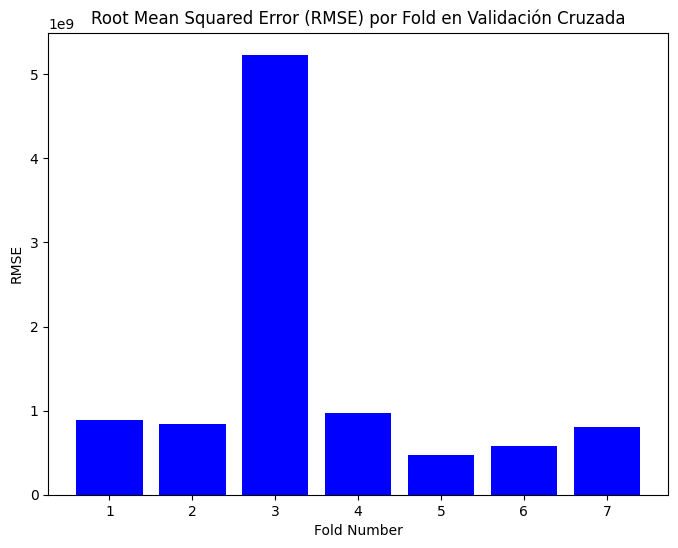

In [84]:
#creamos gráfica
rmse_scores = np.sqrt(np.abs(score_kfold))

# Crear una gráfica de barras
plt.figure(figsize=(8,6))
plt.bar(range(1, len(rmse_scores) + 1), rmse_scores, color='blue')
plt.xlabel('Fold Number')
plt.ylabel('RMSE')
plt.title('Root Mean Squared Error (RMSE) por Fold en Validación Cruzada')
plt.xticks(range(1, len(rmse_scores) + 1))

# Mostrar la gráfica
plt.show()

In [85]:
RMSE_kfold = np.sqrt(np.abs(score_kfold).mean())
# Print the RMSE for k-fold cross-validation
print("Root Mean Squared Error (k-fold CV):", RMSE_kfold)

Root Mean Squared Error (k-fold CV): 2105372963.9275043


## Conclusión


En este caso, los valores de RMSE varían bastante, con un mínimo de ~1 y un máximo de ~5. Esta diferencia puede ser un indicativo de que el modelo tiene dificultades para generalizar bien en algunos folds (donde RMSE es alto) mientras que en otros el error es significativamente más bajo.

El valor de 2105372963.9275043 es significativamente mayor que el resto, lo que sugiere que en al menos un fold, el modelo está teniendo dificultades para predecir los valores correctamente. Esto podría ser causado por una distribución particular de los datos en ese fold, lo que indica que el modelo no es robusto para generalizar en todos los subconjuntos.
